In [1]:
from nanooptics import cycorr
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
data = np.load('./g2_save.npz')

chan = data['channel']
tt = data['timeTags']/1e12 # converted to seconds

In [3]:
td = cycorr.syncdiff(chan, tt, 7, reverse=True) # since the sync is only recorded AFTER an event is successfully detected reverse=True

internally converted channel to uint8 for cython
internally converted syncchan to uint8 for cython


<IPython.core.display.Javascript object>


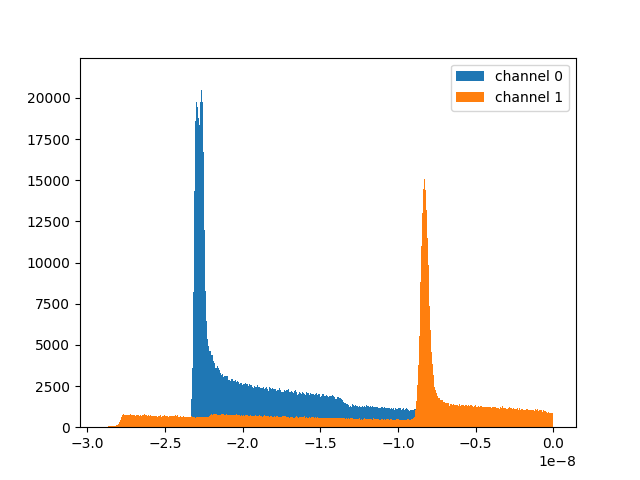

In [4]:
plt.figure()
plt.hist(np.array(td)[chan==0][1:], bins=1000, label='channel 0'); # first entry in channel 0 is off somehow
plt.hist(td[chan==1], bins=1000, label='channel 1')
plt.legend()

In [5]:
# filter events of the short lived background
bg_chan0 = (td > -2.35e-8) & (td < -2.25e-8) & (chan == 0)
bg_chan1 = (td > -.9e-8) & (td < -.76e-8) & (chan == 1)
nobg = ~(bg_chan0 | bg_chan1)

In [6]:
t, g2, g2e = cycorr.corr(chan, tt, cutofftime=1e-7, resolution=200e-12)
t_f, g2_f, g2e_f = cycorr.corr(chan[nobg], tt[nobg], cutofftime=1e-7, resolution=200e-12)

<IPython.core.display.Javascript object>


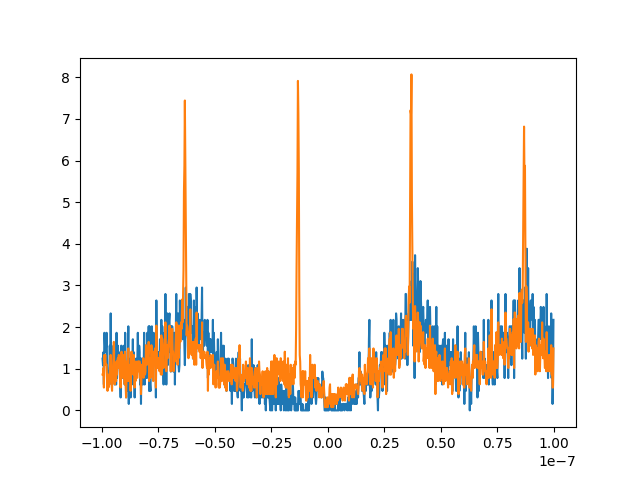

In [7]:
plt.figure()
plt.plot(t_f, g2_f)
plt.plot(t, g2)